# I. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [22]:
df_origin = pd.read_csv(r"D:\Data\TAB_Betting_Data.csv")
df = df_origin.copy()

## 2.2 Overview the Data

In [23]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [25]:
df.describe()

,BET_ACCOUNT_NUM_HASH,AGE,TENURE_IN_DAYS,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
count,1.236410e+07,1.236142e+07,1.236410e+07,8.576656e+06,1.779580e+06,8.527489e+06,15678.000000,1.236410e+07,1.236410e+07,1.236410e+07,1.236410e+07
mean,2.144468e+09,5.314939e+01,3.437851e+03,1.235937e+02,1.278436e+02,1.063339e+02,37.800517,1.775206e+02,1.467335e+02,2.771342e+01,2.212268e+01
std,1.240403e+09,1.536221e+01,3.416204e+03,5.274644e+02,7.873640e+02,3.022158e+02,91.525587,6.407664e+02,6.863462e+02,2.300061e+02,6.451099e+01
min,1.315400e+04,1.800000e+01,-1.000000e+00,-1.000000e+03,-5.500000e+02,0.000000e+00,0.000000,-1.000000e+03,-2.550000e+03,-1.123050e+05,1.000000e+00
25%,1.067720e+09,4.100000e+01,9.550000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.000000,1.600000e+01,0.000000e+00,1.888508e+00,2.000000e+00
50%,2.151297e+09,5.400000e+01,2.316000e+03,3.000000e+01,2.300000e+01,3.000000e+01,11.000000,5.000000e+01,1.435000e+01,1.099573e+01,7.000000e+00
75%,3.217306e+09,6.500000e+01,4.708000e+03,9.000000e+01,7.200000e+01,9.575000e+01,32.000000,1.450000e+02,9.561000e+01,4.000000e+01,2.000000e+01
max,4.294965e+09,1.040000e+02,2.132900e+04,2.267710e+05,1.987243e+05,2.482320e+05,2368.000000,2.648910e+05,4.137750e+05,8.088635e+04,1.911400e+04


In [26]:
# Find the range of dates in the DATE_DIM column
date_min = df['DATE_DIM'].min()
date_max = df['DATE_DIM'].max()

date_min, date_max


('2021-01-01', '2022-12-31')

- Data range in 2 years (2021,2022)

## 2.3 Checking & Dealing with Null Values

In [27]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
null_values

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

**Null Values appear in some column**
- AGE: Since age is an important demographic attribute, we might not want to discard rows with missing ages without further analysis. One approach could be to fill in the missing values with the median age, assuming age is typically a well-behaved attribute with a central tendency.
- Betting Turnover Columns (FOB_RACING_TURNOVER, FOB_SPORT_TURNOVER, PARI_RACING_TURNOVER, PARI_SPORT_TURNOVER): For turnover columns, null values likely indicate that the customer did not place bets in those categories for the day. It would be reasonable to fill these null values with 0, indicating no activity.

In [28]:
# Fill AGE null values with the median age
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Fill betting turnover columns' null values with 0
betting_turnover_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_turnover_columns] = df[betting_turnover_columns].fillna(0)


In [29]:
# Re-check for null values to confirm changes
null_values_after = df.isnull().sum()
null_values_after

DATE_DIM                0
DAY_OF_WEEK             0
BET_ACCOUNT_NUM_HASH    0
AGE                     0
AGE_BAND                0
GENDER                  0
TENURE_IN_DAYS          0
RESIDENTIAL_STATE       0
FOB_RACING_TURNOVER     0
FOB_SPORT_TURNOVER      0
PARI_RACING_TURNOVER    0
PARI_SPORT_TURNOVER     0
TOTAL_TURNOVER          0
DIVIDENDS_PAID          0
GROSS_MARGIN            0
TICKETS                 0
dtype: int64

- No null left

## 2.4 Checking & Dealing with duplicated rows

In [30]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

- No duplicated rows founf in this dataset. Luckily!

## 2.5 Checking Unique Per Columns

In [31]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'DATE_DIM':
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '2021-0

In [46]:
for column in df.columns:
    print(f"Unique values counts in '{column}':")
    print(df[column].unique().value_counts())
    print("\n")

Unique values counts in 'DATE_DIM':


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

# III. Data Visualization

## 3.1 Descriptive Analysis

In [32]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5


### 3.1.1 Age

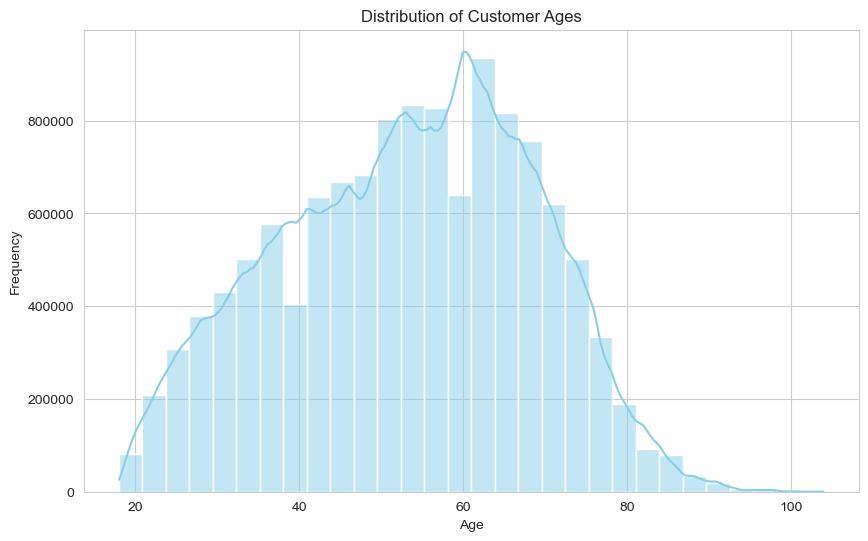

In [33]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### 3.1.2 Gender

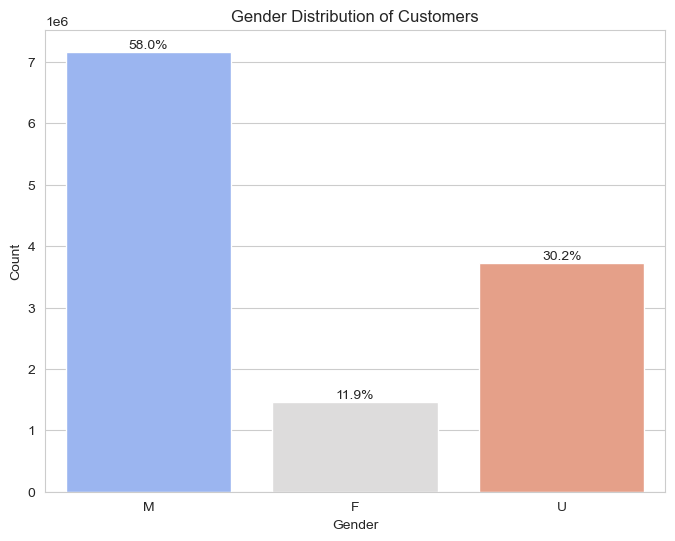

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='GENDER', data=df, palette='coolwarm')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate bars with counts
total = len(df['GENDER'])
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


### 3.1.3 Tenure in days

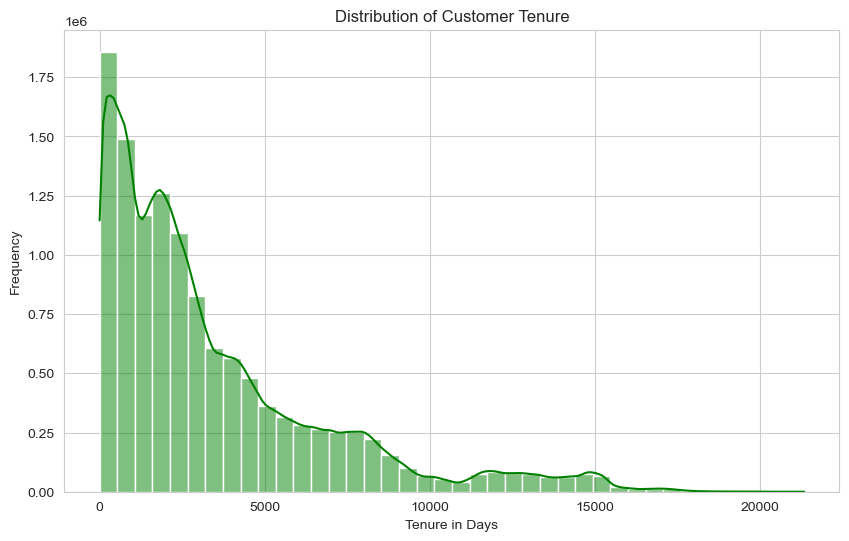

In [35]:
# Plot for TENURE_IN_DAYS
plt.figure(figsize=(10, 6))
sns.histplot(df['TENURE_IN_DAYS'], bins=40, kde=True, color='green')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure in Days')
plt.ylabel('Frequency')
plt.show()


### 3.1.4 Total Turnover 

In [40]:
# Filter the dataset to find rows where TOTAL_TURNOVER is less than 0
negative_turnover = df[df['TOTAL_TURNOVER'] < 0]

negative_turnover


,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
75697,2021-01-04,Mon,3981376054,23.0,18-24,M,982,OTH,0.0,-0.5,0.0,0.0,-0.5,0.0,-0.500000,4
116813,2021-01-08,Fri,75449323,73.0,65+,M,3952,WA,0.0,-15.0,0.0,0.0,-15.0,0.0,-15.000000,2
117414,2021-01-08,Fri,242693437,27.0,25-34,U,2251,WA,0.0,-25.0,12.0,0.0,-13.0,44.9,-22.589583,2
117937,2021-01-08,Fri,388555288,60.0,55-64,M,2268,WA,0.0,-10.0,0.0,0.0,-10.0,0.0,-10.000000,2
119190,2021-01-08,Fri,731206846,51.0,45-54,M,4126,WA,0.0,-25.0,0.0,0.0,-25.0,0.0,-25.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262294,2022-11-02,Wed,3534451784,54.0,45-54,F,8777,WA,-3.0,0.0,0.0,0.0,-3.0,-22.1,19.100000,1
11262690,2022-11-02,Wed,3635954232,60.0,55-64,U,1214,WA,-4.0,0.0,0.0,0.0,-4.0,-60.0,56.000000,1
11262733,2022-11-02,Wed,3647222964,40.0,35-44,U,2587,WA,-1.0,0.0,0.0,0.0,-1.0,-7.5,6.500000,1
11263660,2022-11-02,Wed,3890974038,45.0,45-54,U,1,WA,-10.0,0.0,0.0,0.0,-10.0,-53.5,43.500000,1


c:\Users\thanh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\thanh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 5.42306720285466] is not finite

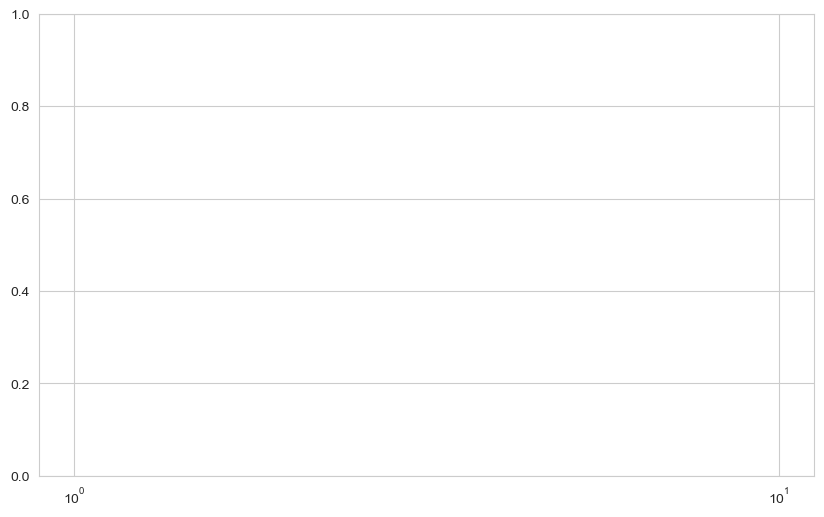

In [18]:
# Plot for TOTAL_TURNOVER with log transformation for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_TURNOVER'], bins=50, kde=True, color='purple', log_scale=True)
plt.title('Distribution of Total Turnover (Log Scale)')
plt.xlabel('Total Turnover (Log Scale)')
plt.ylabel('Frequency')
plt.show()

### 3.1.5 Days Of Weeek

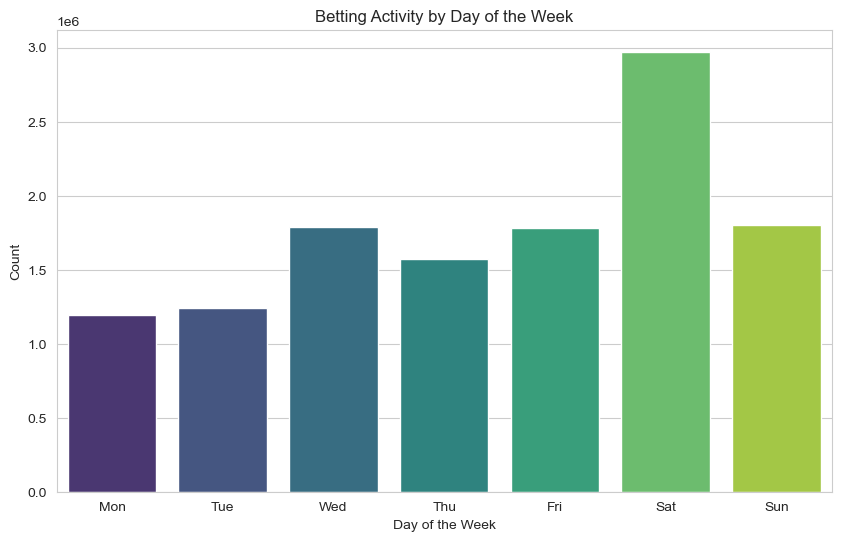

In [36]:
# Plot for DAY_OF_WEEK
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='viridis')
plt.title('Betting Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


### 3.1.6 Residential State

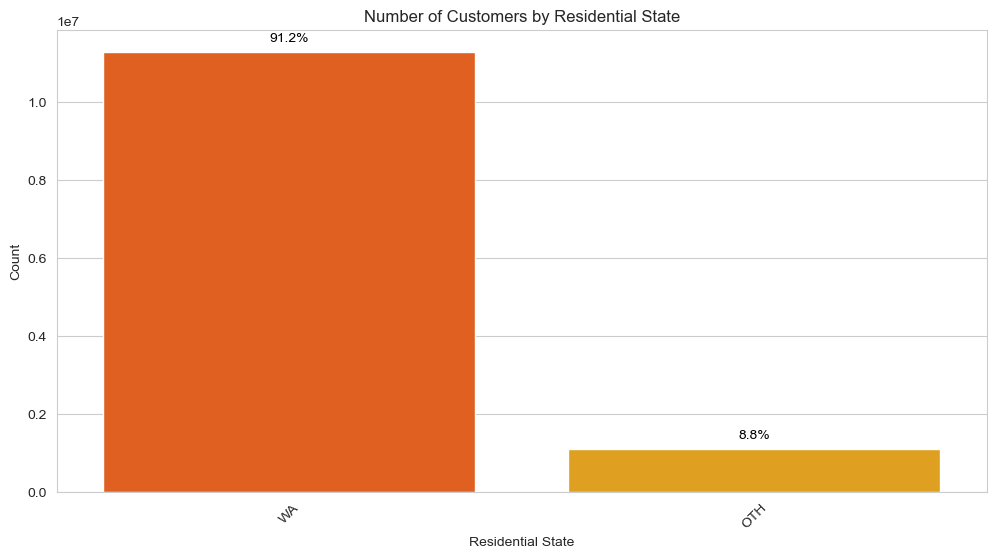

In [45]:
# Plot for RESIDENTIAL_STATE with percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='RESIDENTIAL_STATE', data=df, palette='autumn')
plt.title('Number of Customers by Residential State')
plt.xlabel('Residential State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Calculate total number of entries for calculating percentages
total = len(df['RESIDENTIAL_STATE'])

# Annotate percentages above bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()


### 3.1.7 Age Band

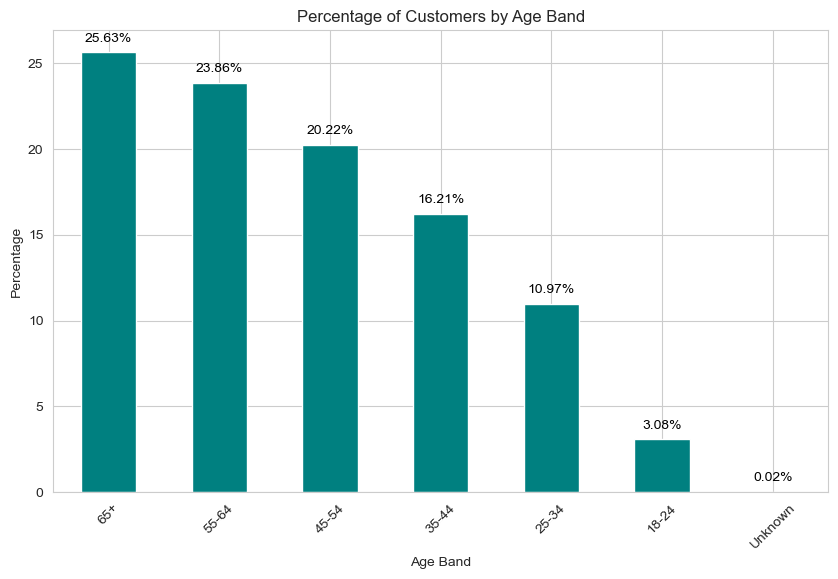

In [42]:
# Calculate the percentage of each AGE_BAND
age_band_percentage = df['AGE_BAND'].value_counts(normalize=True) * 100

# Plot for AGE_BAND percentages with annotations for percentages
plt.figure(figsize=(10, 6))
ax = age_band_percentage.plot(kind='bar', color='teal')
plt.title('Percentage of Customers by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Annotate percentages above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()


### 3.1.8 Tickets

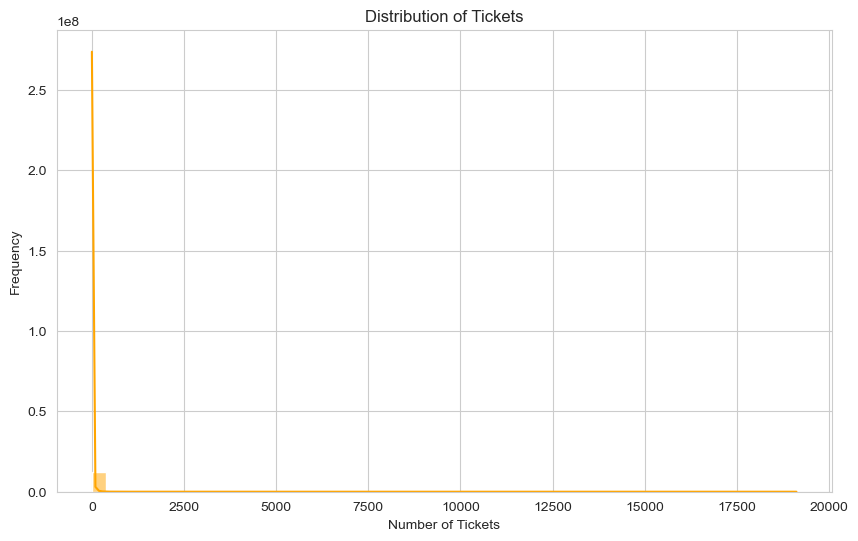

In [47]:
# Plot for TICKETS distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TICKETS'], bins=50, kde=True, color='orange')
plt.title('Distribution of Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')
plt.show()


### 3.1.9 Date Dim

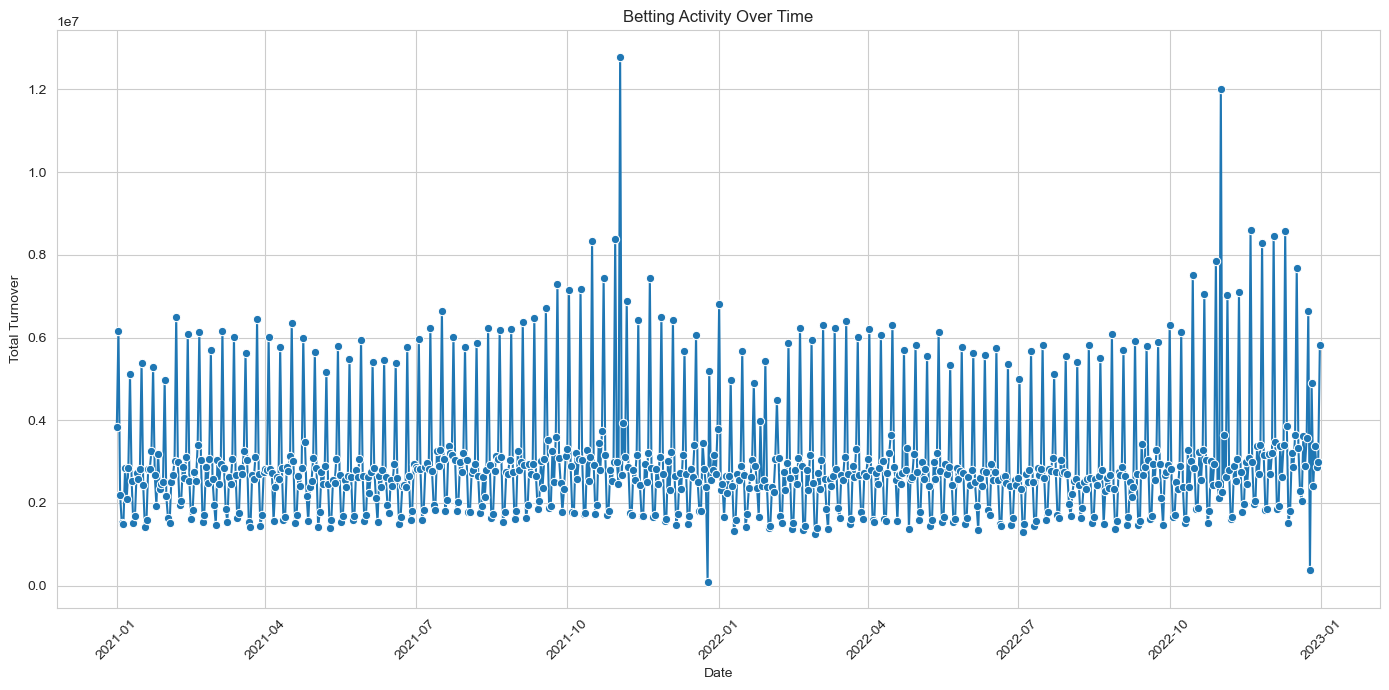

In [49]:
# Convert DATE_DIM to datetime for proper trend analysis
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

# Aggregate data by DATE_DIM to get total turnover per day
daily_turnover = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

# Plotting the trend of Total Turnover over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='DATE_DIM', y='TOTAL_TURNOVER', data=daily_turnover, marker='o')
plt.title('Betting Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
